# Introduction
In this notebook, we continue with ODI performance of international bowlers dataset. In this we will be completing the following tasks:

### 1. Data Pre-processing
* Removing unnecessary features
* Feature Engineering
* Encoding categorical features
* Filling missing values

### 2. Model implementations
* Implementing supervised machine learning models
* Calculating Accuracy score, Precision score, F1-score and Recall score of the implemented models

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cricket-player-info/cricket_bowler_information.csv


In [2]:
dataset=pd.read_csv('/kaggle/input/cricket-player-info/cricket_bowler_information.csv')

# Data Pre-processing

In [3]:
#checking for missing values
dataset.isnull().sum()

Innings Player                0
Opposition                    0
Ground                        0
Country                       0
4_Wickets                     0
5_Wickets                     0
Maidens_Bowled                0
Wickets_Taken                 0
Runs_conceded                 0
Innings_Number                0
Overs_Bowled                  0
Year                          0
Month                         0
Day                           0
bowlingStyle               6301
Balls_bowled                  0
FF                            0
consistency               23446
Average_Career            23335
Strike_rate_Career        23308
form                      34660
Average_Yearly            34549
Strike_rate_Yearly        34571
opposition                33980
Average_opposition        33947
Strike_rate_opposition    33884
venue                     40902
Average_venue             40857
Strike_rate_venue         40850
dtype: int64

In [4]:
#bowlingStyle contains categorical values, so it is best to fill the missing values with mode
dataset['bowlingStyle'].fillna(dataset['bowlingStyle'].mode()[0], inplace=True)


#rest of the missing values are replaced by medians of the respective columns
def fmedian(df,col):
    median_value=df[col].median()
    df[col].fillna(median_value, inplace=True)
    
fmedian(dataset,'consistency')
fmedian(dataset,'Average_Career')
fmedian(dataset,'Strike_rate_Career')
fmedian(dataset,'form')
fmedian(dataset,'Average_Yearly')
fmedian(dataset,'Strike_rate_Yearly')
fmedian(dataset,'opposition')
fmedian(dataset,'Average_opposition')
fmedian(dataset,'Strike_rate_opposition')
fmedian(dataset,'Strike_rate_venue')
fmedian(dataset,'venue')
fmedian(dataset,'Average_venue')

In [5]:
dataset.dtypes

Innings Player             object
Opposition                 object
Ground                     object
Country                    object
4_Wickets                   int64
5_Wickets                   int64
Maidens_Bowled              int64
Wickets_Taken               int64
Runs_conceded               int64
Innings_Number              int64
Overs_Bowled              float64
Year                        int64
Month                       int64
Day                        object
bowlingStyle               object
Balls_bowled                int64
FF                          int64
consistency               float64
Average_Career            float64
Strike_rate_Career        float64
form                      float64
Average_Yearly            float64
Strike_rate_Yearly        float64
opposition                float64
Average_opposition        float64
Strike_rate_opposition    float64
venue                     float64
Average_venue             float64
Strike_rate_venue         float64
dtype: object

## Label Encoding
Here, we are label encoding all the categorical variables using Label Encoder from sklearn library.

In [6]:
from sklearn.preprocessing import LabelEncoder

def encode(df,col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

encode(dataset,'Innings Player')
encode(dataset,'Ground')
encode(dataset,'Country')
encode(dataset,'Opposition')
encode(dataset,'Day')
encode(dataset,'bowlingStyle')

## Checking Correlation
We will be checking correlations between the variables to better understand the data.

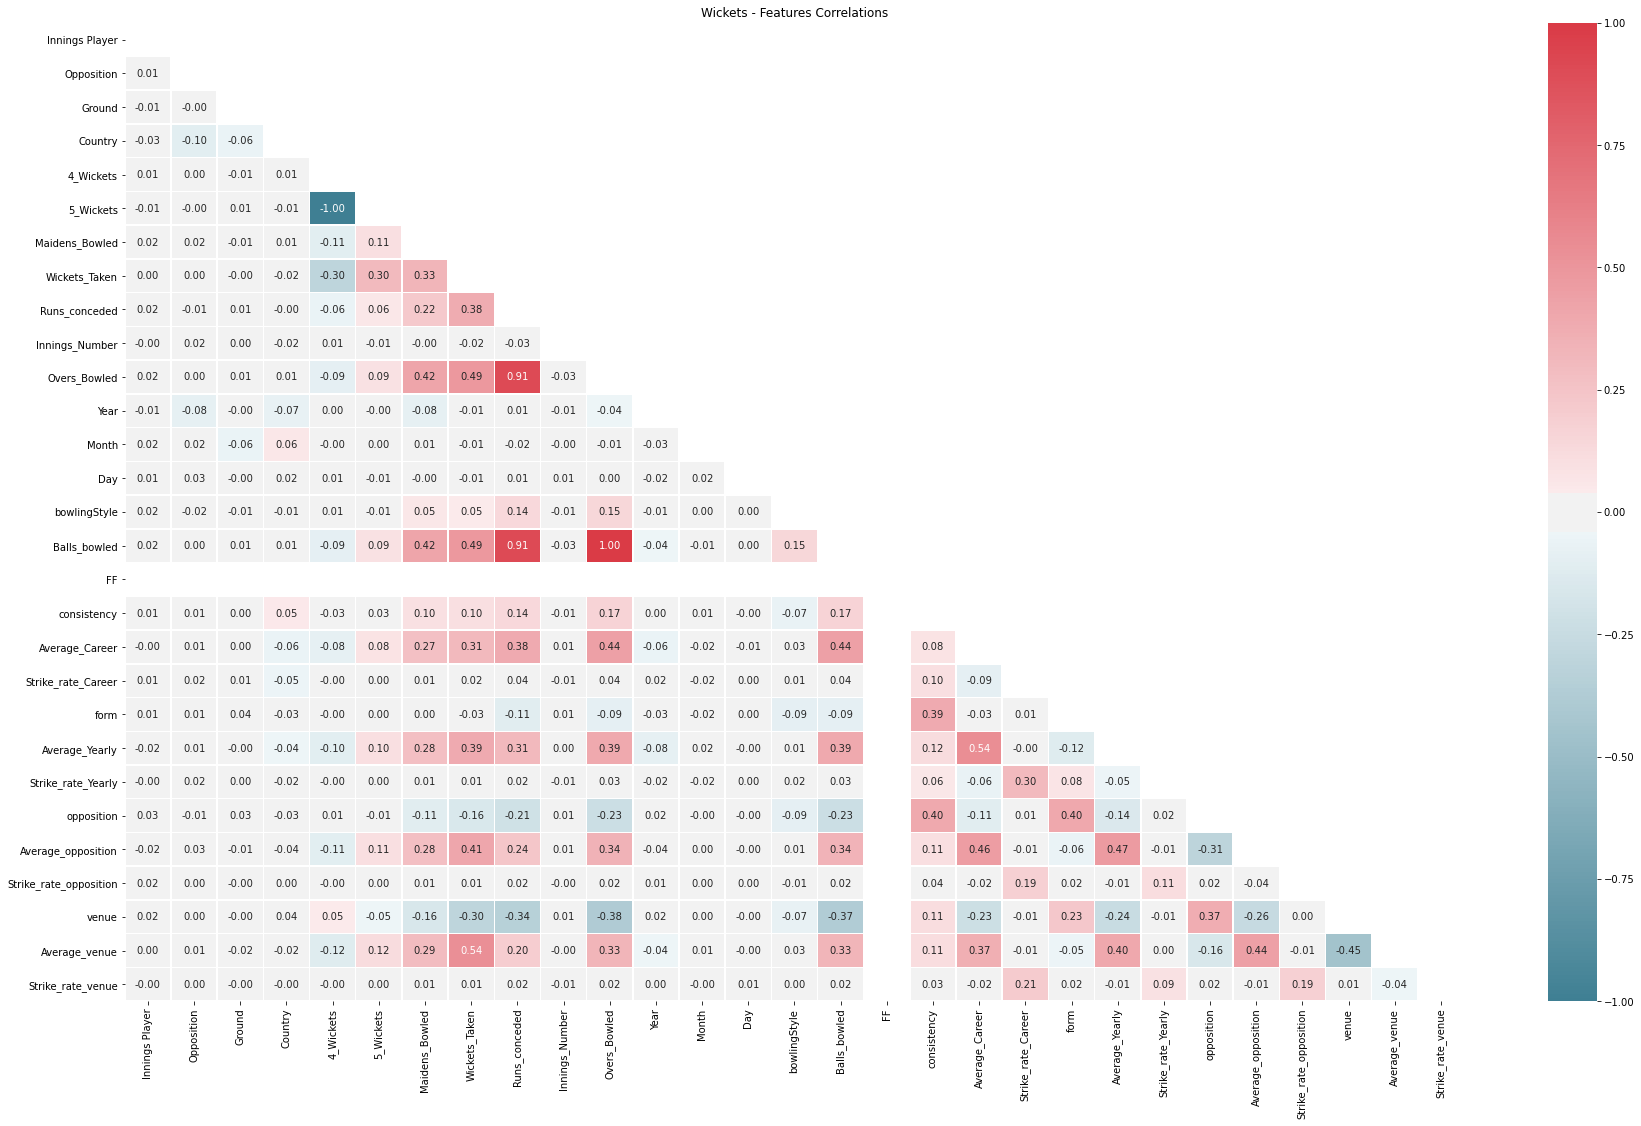

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(30, 18))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Wickets - Features Correlations')
plt.show()

In [8]:
#Balls bowled and Overs Bowled are perfectly corelated, so it is necessary to remove one of them
dataset.drop('Overs_Bowled',axis=1,inplace=True)

In [9]:
target=dataset['Wickets_Taken']
train=dataset.drop('Wickets_Taken', axis=1)

In [10]:
target.value_counts()

1    95886
2    16910
3     2447
Name: Wickets_Taken, dtype: int64

## Class Imbalance
We observed that majority of the records fall within class 1 in bowling. This created a major imbalance in the distribution of values and affected the performance of the learning algorithms. To solve this problem, we applied an oversampling technique Supervised Minority Oversampling Technique (SMOTE) on minority classes to make all the classes equally distributed.

In [11]:
#applying SMOTE
from imblearn.combine  import SMOTETomek
smk=SMOTETomek(random_state=42)
train_new,target_new=smk.fit_sample(train,target)

In [12]:
#splitting dataset into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new, target_new, test_size = 0.20, random_state = 0)

# Model Implementation
1. Naive Bayes
2. Decision Trees
3. Random Forest

### Naive Baye's 

In [13]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.6816901898074115
Precision - 0.826253021261791
Recall - 0.6816901898074115
F1 - 0.6731746854897963


### Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', splitter='best',
                             max_depth=16, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features=None, random_state=None,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight=None, 
                             presort='deprecated', ccp_alpha=0.0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.9411457971216018
Precision - 0.9426999986748642
Recall - 0.9411457971216018
F1 - 0.941133486704149


### Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.9990961551832024
Precision - 0.9990976814058883
Recall - 0.9990961551832024
F1 - 0.9990960963132317


# Conclusion
With an accuracy of 0.99, Random Forest has been performing the best for our dataset while Naive Bayes has been performing the worst with an accuracy of 0.68.